<a href="https://colab.research.google.com/github/mahesh2301/MaheshSharma/blob/main/Recommendation_Engine_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Recommendation System for Netflix Prize Dataset using SVD

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To load the 'combined_data_1' dataset after uploading it to Jupyter notebook

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download <netflix-prize-data>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: ` kaggle competitions download <netflix-prize-data>'


In [ ]:
! kaggle datasets download -d netflix-inc/netflix-prize-data

 99% 676M/683M [00:14<00:00, 80.2MB/s]
100% 683M/683M [00:14<00:00, 47.8MB/s]


In [ ]:
! unzip /content/netflix-prize-data.zip

Archive:  /content/netflix-prize-data.zip
  inflating: README                  
  inflating: combined_data_1.txt     
  inflating: combined_data_2.txt     
  inflating: combined_data_3.txt     
  inflating: combined_data_4.txt     
  inflating: movie_titles.csv        
  inflating: probe.txt               
  inflating: qualifying.txt          


In [ ]:
dataset = pd.read_csv('/content/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
dataset.head(5)

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
# Reading dataset file
dataset = pd.read_csv('/content/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#not named---->we are naming the columns 

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)
#3
#3.5----->float--->rating column
dataset.shape


(24058263, 2)

In [ ]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
#To inspect the shape of the datset
dataset.shape



(24058263, 2)

In [ ]:
#To print the head of dataset
dataset.head()

#1:----->1st movie
#1xyz rows 

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])
#3--->1st row
#3--->10th row
#3  merge it
p

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [ ]:
# get movie count by counting nan values

movie_count = dataset.isnull().sum()[1]

movie_count

#4499 total number of movies present in dataset

4499

In [ ]:
dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count
# - movie_count because 
#we dont want 1,2,3,4.... movie cpunt
#to be added
cust_count

470758

In [ ]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

24053764

## To plot the distribution of the ratings in as a bar plot

Text(0.5, 1.0, 'Total pool: 4499 Movies, 470758 customers, 24053764 ratings given')

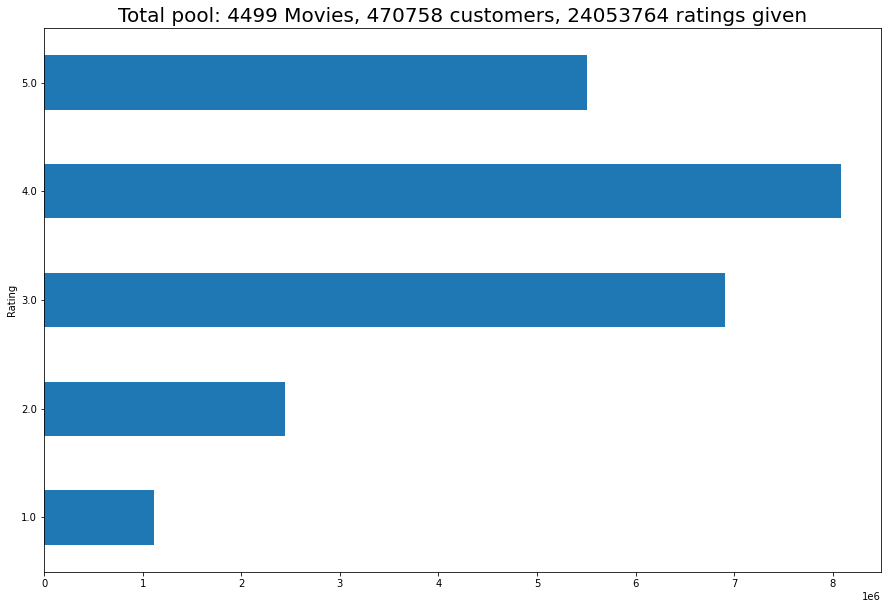

In [ ]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
#plt.axis('off')


#print--->print data  '' 'Total pool'  

# To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset

In [ ]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset['Rating']))

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [ ]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]


df_nan.shape

(4499, 1)

In [ ]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()



df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [ ]:
df_nan['index'][1:]

1         548
2         694
3        2707
4        2850
5        3991
        ...  
194    816648
195    816834
196    816989
197    898250
198    898445
Name: index, Length: 198, dtype: int64

In [ ]:
df_nan['index'][:-1]

0           0
1         548
2         694
3        2707
4        2850
        ...  
193    816001
194    816648
195    816834
196    816989
197    898250
Name: index, Length: 198, dtype: int64

In [ ]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [  1.   1.   1. ... 199. 199. 199.]
Length: 917083


In [ ]:
#x =zip(df_nan['index'][1:],df_nan['index'][:-1])

In [ ]:
#temp = np.full((1,547), 1)

In [ ]:
#print(temp)

In [ ]:
#tuple(x)

In [ ]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
dataset.shape

(917083, 3)

# Data Cleaning

In [ ]:
f = ['count','mean']
#count and mean 

In [ ]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1377.0


In [ ]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')



Customer minimum times of review: 4.0


In [ ]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (917083, 3)


In [ ]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (558621, 3)


In [ ]:

print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
699,44937,5.0,3
700,656399,4.0,3
701,439011,1.0,3


# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [ ]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(87547, 60)


In [ ]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,178,180,181,185,187,188,189,191,197,199
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


### To load the movie_titles dataset

In [ ]:
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


# To install the scikit-surprise library for implementing SVD

### Run the following command in the Anaconda Prompt to install surprise package

In [ ]:
conda install -c conda-forge scikit-surprise

SyntaxError: ignored

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 3.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633701 sha256=161345529fb7d0e485aea8238f20c88418a948e29c2bffa439d6b4f17698ffb8
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9931  0.9936  0.9901  0.9923  0.0016  
MAE (testset)     0.8010  0.8052  0.7926  0.7996  0.0052  
Fit time          4.03    4.03    3.95    4.00    0.04    
Test time         0.32    0.20    0.20    0.24    0.06    


{'fit_time': (4.027621269226074, 4.029395341873169, 3.948441743850708),
 'test_mae': array([0.80095763, 0.80515501, 0.79263629]),
 'test_rmse': array([0.99313962, 0.99363986, 0.99010124]),
 'test_time': (0.32404088973999023, 0.1994328498840332, 0.2039785385131836)}

In [ ]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
699,44937,5.0,3
700,656399,4.0,3
701,439011,1.0,3


## To find all the movies rated as 5 stars by user with userId = 712664

In [ ]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3            Character
79         The Killing
175     Reservoir Dogs
199    The Deer Hunter
Name: Name, dtype: object

# Train an SVD to predict ratings for user with userId = 1

In [ ]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often 
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

       Year                                               Name  Estimate_Score
32   2000.0                     Aqua Teen Hunger Force: Vol. 1        4.778312
198  1978.0                                    The Deer Hunter        4.644779
67   2004.0                                        Invader Zim        4.570334
166  2004.0                                         The Chorus        4.527650
174  1992.0                                     Reservoir Dogs        4.415828
78   1956.0                                        The Killing        4.339772
164  1982.0            Richard Pryor: Live on the Sunset Strip        4.306365
179  2002.0                                            Scratch        4.171136
112  2000.0                     Bruce Lee: A Warrior's Journey        4.131961
31   2004.0  ABC Primetime: Mel Gibson's The Passion of the...        4.075139
